# Sales Analysis Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_feather(r"E:\Python Project\Sales_data.ftr")

In [3]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [4]:
df.shape

(186850, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## Data cleaning and formatting

In [7]:
## checking out total missing values we have
df.isnull().sum()  

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
df =df.dropna(how="all")

In [9]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
## checking duplicates
df.duplicated().sum()

618

In [11]:
df = df.drop_duplicates() 

In [12]:
df.shape

(185687, 6)

In [13]:
df.duplicated().sum()

0

In [14]:
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')

In [15]:
df[df['Order ID'].isna()]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,NaN,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
df.drop(519, inplace=True)


In [17]:
df[df['Order ID'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [18]:
df['Order ID'] = df['Order ID'].astype('Int64')

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [21]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [22]:
df['Price Each'] = df['Price Each'].astype(float)

In [23]:
df.dtypes

Order ID                     Int64
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## 1. Which is the best month for sale ?

In [26]:
df['month'] = df['Order Date'].dt.month

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [28]:
df['month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [29]:
df['sales'] = df['Quantity Ordered'] * df['Price Each']

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [31]:
df.groupby(['month'])['sales'].sum()

month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<AxesSubplot:xlabel='month'>

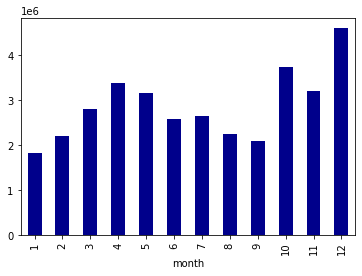

In [32]:
df.groupby(['month'])['sales'].sum().plot(kind='bar',color='DarkBlue')

### December is the best month of sales


## 2. Which city has max order ? 

In [33]:
df['city'] = df['Purchase Address'].str.split(',').str[1].str.strip()

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [35]:
df.groupby(['city'])['Quantity Ordered'].sum().sort_values(ascending=False)

city
San Francisco    50169
Los Angeles      33247
New York City    27903
Boston           22494
Dallas           16707
Atlanta          16584
Seattle          16534
Portland         14037
Austin           11137
Name: Quantity Ordered, dtype: int32

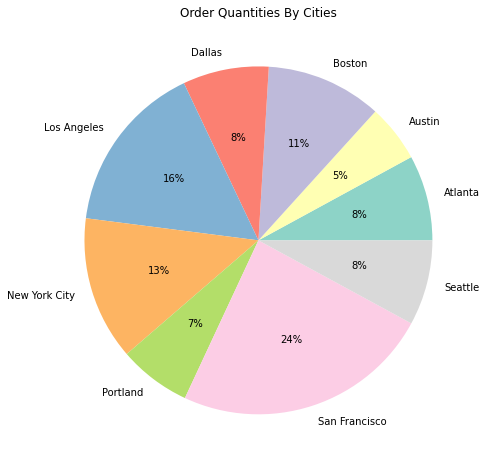

In [36]:
plt.figure(figsize=(8,8))
df.groupby(['city'])['Quantity Ordered'].sum().plot(kind='pie' , autopct = '%1.0f%%',colors=sns.color_palette('Set3'))
plt.ylabel('')
plt.title('Order Quantities By Cities')
plt.show()

### The city with the maximum number of orders is San Francisco.

## 3. What product sold the most &  Why?

In [37]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city'],
      dtype='object')

In [38]:
count_df=df.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'}).sort_values(by='Quantity Ordered',ascending=False)
count_df = count_df.reset_index()
count_df

,Product,Quantity Ordered,Price Each
0,AAA Batteries (4-pack),30986,2.99
1,AA Batteries (4-pack),27615,3.84
2,USB-C Charging Cable,23931,11.95
3,Lightning Charging Cable,23169,14.95
4,Wired Headphones,20524,11.99
5,Apple Airpods Headphones,15637,150.00
6,Bose SoundSport Headphones,13430,99.99
7,27in FHD Monitor,7541,149.99
8,iPhone,6847,700.00
9,27in 4K Gaming Monitor,6239,389.99


In [39]:
products = count_df['Product'].values
products

array(['AAA Batteries (4-pack)', 'AA Batteries (4-pack)',
       'USB-C Charging Cable', 'Lightning Charging Cable',
       'Wired Headphones', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', '27in FHD Monitor', 'iPhone',
       '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Google Phone',
       'Flatscreen TV', 'Macbook Pro Laptop', 'ThinkPad Laptop',
       '20in Monitor', 'Vareebadd Phone', 'LG Washing Machine',
       'LG Dryer'], dtype=object)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12804\391901012.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(count_df['Product'], rotation='vertical', fontsize=8)


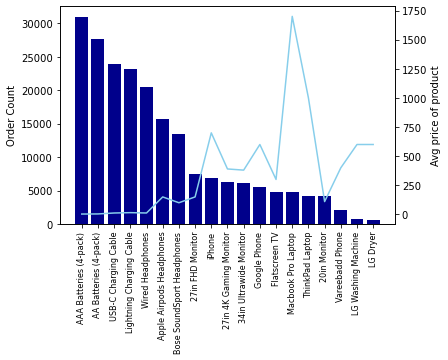

In [40]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color='darkblue')  

ax2.plot(count_df['Product'], count_df['Price Each'], color='skyblue')

ax1.set_xticklabels(count_df['Product'], rotation='vertical', fontsize=8)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

plt.show()


### The product sold the most is AAA Batteries (4-pack)	

## 4. Understanding Trend of the most sold product ? 

In [41]:
product_sales = df.groupby('Product')['Quantity Ordered'].sum()

top_products = product_sales.sort_values(ascending=False).head(5) 
top_products


Product
AAA Batteries (4-pack)      30986
AA Batteries (4-pack)       27615
USB-C Charging Cable        23931
Lightning Charging Cable    23169
Wired Headphones            20524
Name: Quantity Ordered, dtype: int32

In [42]:
df_top_products = df[df['Product'].isin(top_products.index)]

crosstab_top_products = pd.crosstab(df_top_products['month'], df_top_products['Product'])
crosstab_top_products

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


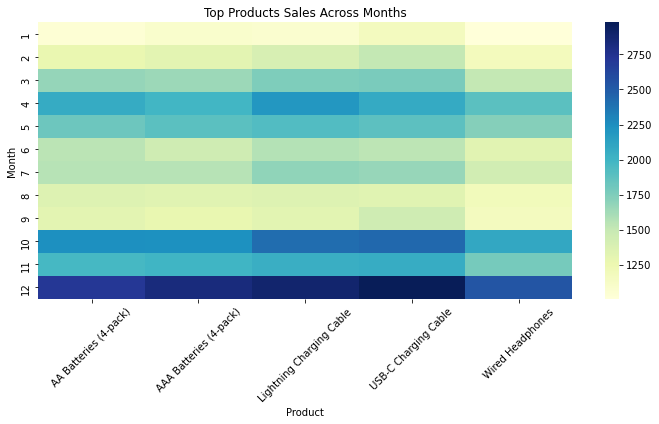

In [43]:
plt.figure(figsize=(10, 6))  
sns.heatmap(crosstab_top_products, cmap="YlGnBu") 
plt.title('Top Products Sales Across Months')
plt.xlabel('Product')
plt.ylabel('Month')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

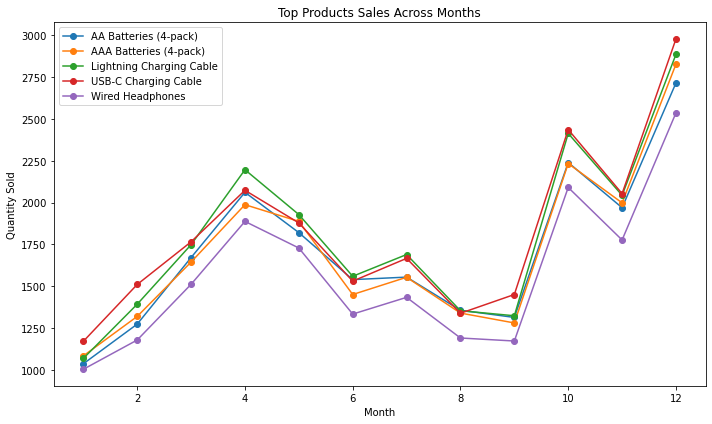

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
for product in crosstab_top_products.columns[:5]:
    plt.plot(crosstab_top_products.index, crosstab_top_products[product], marker='o', label=product)

plt.title('Top Products Sales Across Months')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend() 
plt.tight_layout()
plt.show()


### Month 12 has the most sales.

## 5. What products are most often sold together (same order Id) ?

In [45]:
df_duplicated=df[df['Order ID'].duplicated(keep=False)]

In [46]:
df_duplicated.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco


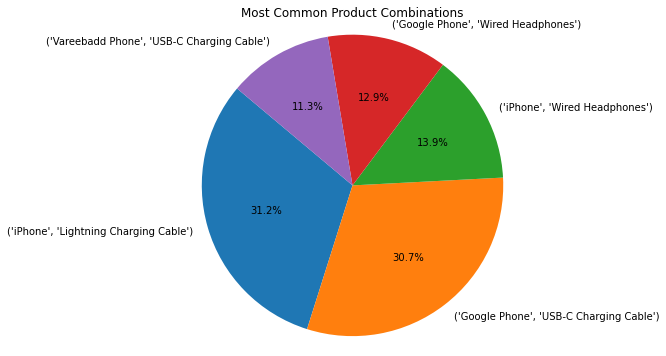

In [47]:
from itertools import combinations
from collections import Counter

grouped = df.groupby('Order ID')['Product'].apply(list)

product_combinations = Counter()

for products in grouped:
    product_combinations.update(combinations(products, 2)) 

most_common_combinations = product_combinations.most_common(5)
combinations, frequencies = zip(*most_common_combinations)

plt.figure(figsize=(6,6))
plt.pie(frequencies, labels=combinations, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Most Common Product Combinations')
plt.show()


## The End